In [3]:
%load_ext autoreload
%autoreload 2

import json
import csv
import psycopg2
import os

import numpy as np
import pandas as pd
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

from sum_stat_table import sum_stat_table
from outlier_table import outlier_table
from distribution_functions import get_var_by_year

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Connect to database
conn = psycopg2.connect(database="evictions"
                            , user='ev_user'
                            , password='alenaclairejustin'
                            , host='evictions.cuvbjnrvbddj.us-east-1.rds.amazonaws.com'
                            , port='5432'
                            , options=f'-c search_path=evictions')

cur = conn.cursor()

## Number of Evictions Options

In [36]:
# 2001 output
output_2001 = get_var_by_year('evictions', 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year('evictions', 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

In [51]:
series_2016.describe()

count    179825.000000
mean          2.402129
std          24.125610
min           0.000000
25%           0.000000
50%           1.040000
75%           2.970000
max        9100.000000
Name: 0, dtype: float64

In [53]:
series_2016[series_2016==0].describe()

count    62321.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: 0, dtype: float64

In [54]:
62321/179825

0.3465647156958154

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


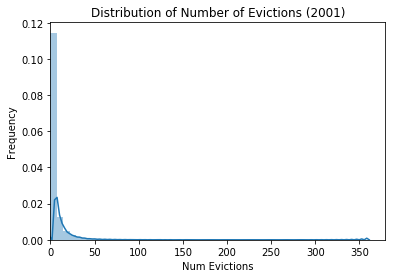

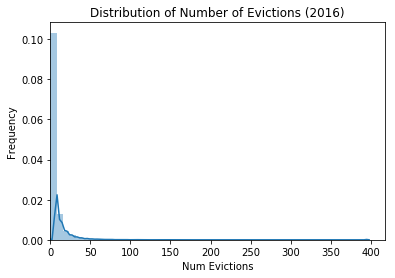

In [37]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(6,4))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(6,4))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


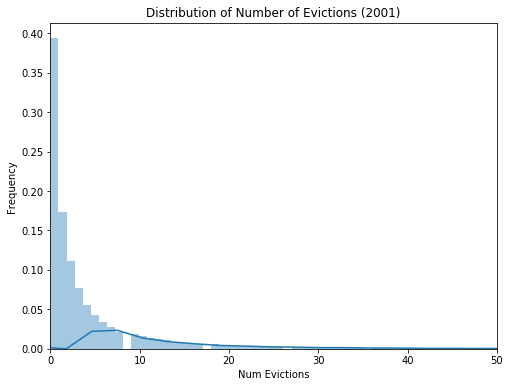

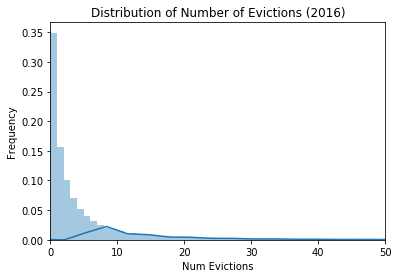

In [38]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(6,4))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

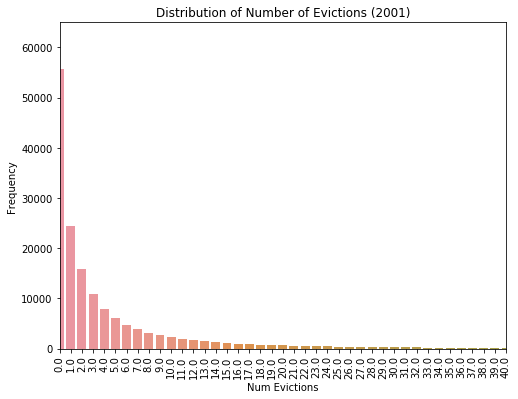

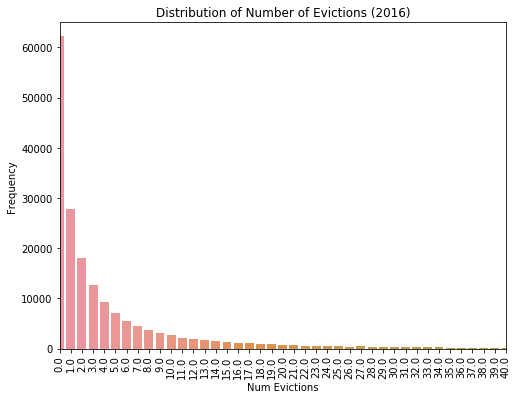

In [39]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

In [40]:
series_2001.sum()

754632.0

In [41]:
series_2016.sum()

898329.0

## Number of Eviction Filings

In [42]:
variable = 'eviction_filings'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


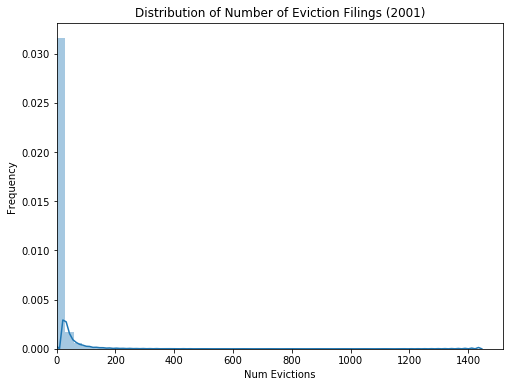

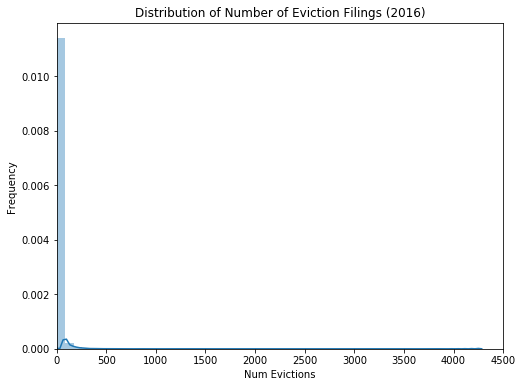

In [43]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


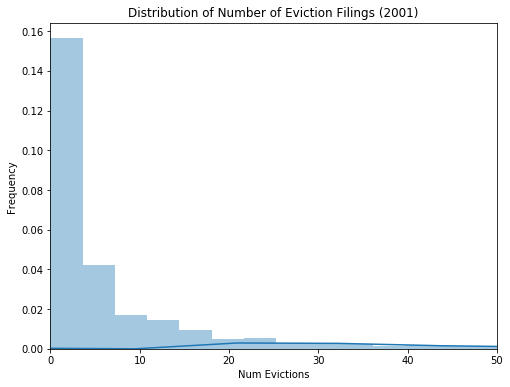

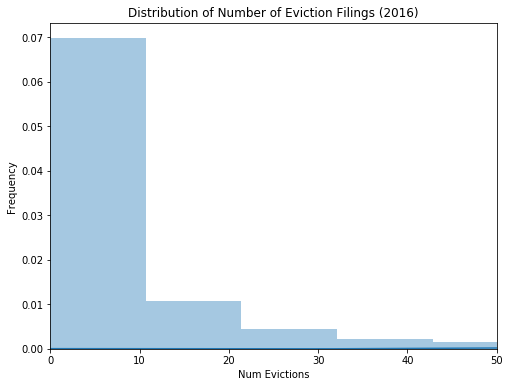

In [44]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

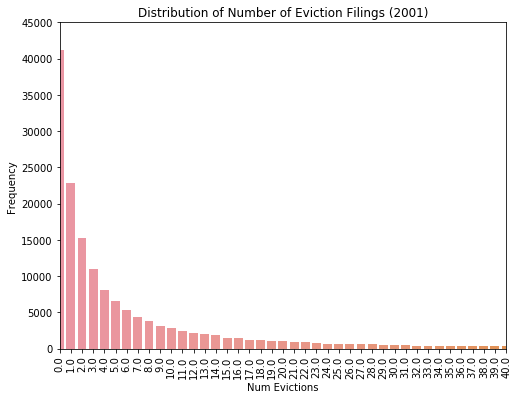

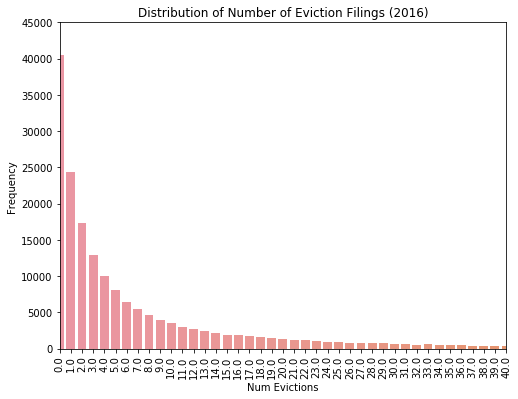

In [45]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

## Eviction Rates

In [46]:
variable = 'eviction_rate'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


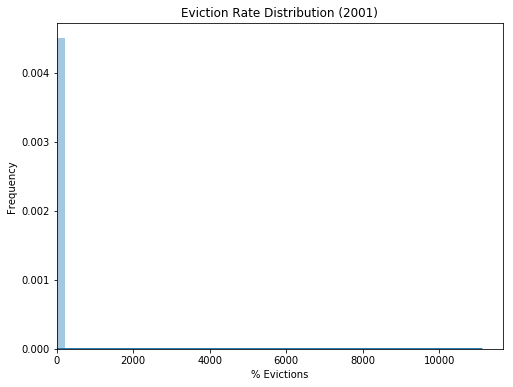

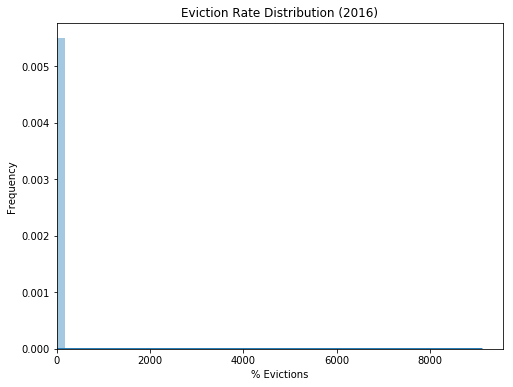

In [47]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

In [48]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()<10], kde=True, bins = 100)
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
#plt.xlim(0, 10)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()<10], kde=True, bins = 100)
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
#plt.xlim(0, 10)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

## Eviction Trends Over Time

In [ ]:
cur.execute("SELECT year, sum(evictions) as ev_tot, avg(eviction_rate) " 
            +"as ev_avgrate, sum(eviction_filings) as file_tot, avg(eviction_filing_rate) as filerate_avg " 
            +"FROM evictions.blockgroup WHERE population>0 GROUP BY year;")
output = cur.fetchall()


In [ ]:
col_names = ['Year', 'Total_Evictions', 'Avg_Eviction_Rate', 
             'Total_Filings', 'Total_Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names).sort_values('Year')
df

In [ ]:
df.plot(x='Year', y = ['Total_Evictions', 'Total_Filings'], kind = 'line' )
plt.show()

In [ ]:
df.plot(x='Year', y = ['Avg_Eviction_Rate', 'Total_Eviction_Rate'], kind = 'line' )
plt.show()

# I think these are above 1 because of small population/multiple eviction proceedings per household... need to adjust

## Rate vs Population

In [ ]:
cur.execute("SELECT year, population, eviction_rate FROM evictions.blockgroup WHERE year=2016 and population>0;")
output = cur.fetchall()

In [ ]:
col_names = ['Year', 'Population', 'Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names)
df.head()

In [ ]:
df.plot(x='Population', y='Eviction_Rate', kind='scatter')
plt.ylim(0,None)
plt.show()

In [ ]:
df[df['Eviction_Rate']>100]

# Summary Statistics Table

In [5]:
sum_stat = sum_stat_table(cur)

In [ ]:
outlier_table = outlier_table(cur)

In [6]:
sum_stat = pd.read_csv('sum_stat_table.csv', index_col = False)
sum_stat = sum_stat[["variable", "avg", "max", "min", "std"]]
outlier_table = pd.read_csv('outlier_table.csv', index_col = False)
outlier_table = outlier_table[["variable", "count high", "avg high", "count low", "avg low"]]
full_table = sum_stat.merge(outlier_table, on = 'variable')

In [7]:
full_table

variable            avg         max  min            std  \
0                   population    1383.688057    39961.00  0.0     781.657001   
1                 poverty_rate       9.557322      138.86  0.0      12.074228   
2          pct_renter_occupied      33.700982      100.00  0.0      25.180474   
3            median_gross_rent     777.837587     6600.00  0.0     471.367187   
4      median_household_income   51966.111374   750003.00  0.0   32627.229012   
5        median_property_value  192659.037998  3458400.00  0.0  192467.721624   
6                  rent_burden      27.768474      251.80  0.0      13.938280   
7                    pct_white      66.476445      100.00  0.0      31.296793   
8                    pct_af_am      12.631181      100.00  0.0      22.756710   
9                 pct_hispanic      13.672512      100.00  0.0      21.045191   
10                  pct_am_ind       0.734740      100.00  0.0       4.522490   
11                   pct_asian       3.865091      100.00  0.0       8.451182   
12                   pct_nh_pi       0.126598       85.88  0.0       1.050734   
13                pct_multiple       1.806485      100.00  0.0       2.728587   
14                   pct_other       0.195377       67.11  0.0       0.978966   
15  renter_occupied_households     183.981912     6236.00  0.0     182.693533   
16            eviction_filings      12.520420     5715.00  0.0      37.980537   
17                   evictions       5.345194      452.00  0.0      11.140590   
18               eviction_rate       3.392249   600000.00  0.0     436.141583   
19        eviction_filing_rate       8.295878  2000000.00  0.0    1524.778828   

    count high      avg high  count low  avg low  
0        44076  5.138397e+03          0      NaN  
1        80143  5.696680e+01          0      NaN  
2            0           NaN          0      NaN  
3        37589  2.670946e+03          0      NaN  
4        60966  1.898563e+05          0      NaN  
5        78280  1.034448e+06          0      NaN  
6        26400  8.556200e+01          0      NaN  
7            0           NaN          0      NaN  
8       150845  9.224528e+01          0      NaN  
9       119024  8.838421e+01          0      NaN  
10       27146  4.214624e+01          0      NaN  
11       90468  4.541275e+01          0      NaN  
12       30903  8.597191e+00          0      NaN  
13       69990  1.525162e+01          0      NaN  
14       45513  6.788050e+00          0      NaN  
15       72041  9.401411e+02          0      NaN  
16       39525  2.385131e+02          0      NaN  
17       54838  6.399389e+01          0      NaN  
18          56  3.024356e+04          0      NaN  
19          54  1.265661e+05          0      NaN